# Using XGBoost in Python
XGBoost is well known to provide better solutions than other machine learning algorithms. Since it was created, it had become the 'state-of-the-art' ML algorithm to deal with structured data.
* It is comparatively faster than other ensemble classifiers.
* Core algorithm is paralelliable: Can harness the power of multi-core computers or cloud systems.
* Consistently outperforms other algorithm methods.
* Wide variety of tuning parameters (cross-validation, regularization, user-defined objective functions, tree parameters, scikit-learn etc.)

We are going to start our journey with XGBoost by importing the boston housing dataset from sklearn

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

The boston variable itself is a dictionary, so you can check for its keys using the .keys() method.

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


You can easily check its shape using ```boston.data.shape``` attribute, which will return the size of the dataset.

In [3]:
print(boston.data.shape)

(506, 13)


As you can see it returned (506, 13), that means there are 506 rows of data with 13 columns. Now, if you want to know what these 13 columns are, you can always use the ```.feature_names``` attribute when referencing the original dictionary:

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Now, let's convert this data to a pandas DataFrame! For that, we need to import pandas and use DataFrame() to set data from the boston dictionary we made:

In [5]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [6]:
#explore the first 5 rows of the new DF

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Notice that the target column, ```'PRICE'``` , is not in this DataFrame. This is because the target column is available in it's own attribute called ```boston.target```. Append this to our DF

In [7]:
data['PRICE'] = boston.target

In [8]:
# Run the .info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Turns out that this dataset has 14 columns (including the target variable ```PRICE```) and 506 rows. Notice that the columns are of ```float``` data-type indicating the presence of only continuous features with no missing values in any of the columns. To get more summary statistics of the different features in the dataset you will use the ```describe()``` method on your DataFrame.

*Note that ```describe()``` only gives summary statistics of columns which are continuous in nature and not categorical.*

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. 
<br>
<br> Also, dealing with NaN values is optional, as XGBoost is capable of handling missing values internally. 
<br>
<br> We will mainly focus on applying the algorithm here, rather than in depth feature engineering. 

In [10]:
# Import XGBoost and other starting libraries we will need

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

Separate the target variable and the rest of the variables using ```.iloc``` to subset the data

In [11]:
X, y = data.iloc[:, :-1], data.iloc[:,-1]

Now, we will convert the dataset into an optimized data structure called ```Dmatrix``` that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [12]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

### XGBoost's Hyperparameters
Before we build this model, here is a brief overview of the common hyperparameters used in this method:
* ```learning_rate```: step size shrinkage used to prevent overfitting. Range is [0,1]
* ```max_depth```: determines how deeply each tree is allowed to grow during any boosting round.
* ```subsample```: percentage of samples used per tree. Low value can lead to underfitting.
* ```colsample_bytree```: percentage of features used per tree. High value can lead to overfitting.
* ```n_estimators```: number of trees you want to build.
* ```objective```: determines the loss function to be used like ```reg:linear``` for regression problems, ```reg:logistic``` for classification problems with only decision, ```binary:logistic``` for classification problems with probability.
<br>

**XGBoost** also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.
* ```gamma```: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
* ```alpha```: L1 regularization on leaf weights. A large value leads to more regularization.
* ```lambda```: L2 regularization on leaf weights and is smoother than L1 regularization.

Now, we create the train and test sets for cross-validation using the ```train_test_split``` function from sklearn's ```model_selection``` module with ```test_size``` equal to 20% of the data:

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Next, instantiate an XGBoost regressor object by calling the ```XGBRegressor()``` class from the XGBoost library, with the hyper-parameters passed as arguments. For classification problems in future projects, the ```XGBClassifier()``` class would be used instead.

In [14]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, 
                          learning_rate = 0.1, max_depth = 5, alpha = 10,
                          n_estimators = 10)

Fit the training set and make predictions on the test set using the ```.fit()``` and ```.predict()``` methods.

In [15]:
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

[21:38:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


Compute the rmse by invoking the ```mean_squared_error``` function from the ```metrics``` module

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.517005


Well, you can see that your RMSE for the price prediction came out to be around 10.8 per 1000$.

## K-fold Cross Validation with XGBoost
In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. 
<br>Also, each entry is used for validation just once. XGBoost supports k-fold cross-validation via the ```cv()``` method. All you have to do is specify the ```nfolds``` parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this [link](http://xgboost.readthedocs.io/en/latest/python/python_api.html)) like:

* num_boost_round: denotes the number of trees you build (analogous to n_estimators)
* metrics: tells the evaluation metrics to be watched during CV
* as_pandas: to return the results in a pandas DataFrame.
* early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
* seed: for reproducibility of results.

<br>
<br>

This time you will create a hyper-parameter dictionary ```params``` which holds all the hyper-parameters and their values as key-value pairs but will exclude the ```n_estimators``` from the hyper-parameter dictionary because you will use ```num_boost_rounds``` instead.
<br>
<br>

You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's ```cv()``` method and store the results in a ```cv_results``` DataFrame. Note that here you are using the Dmatrix object you created before.



In [17]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[21:38:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


```cv_results``` contains train and test RMSE metrics for each boosting round

In [18]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680256,0.025606,21.719121,0.019025
1,19.740499,0.072068,19.818880,0.061770
2,18.007202,0.119745,18.109862,0.129375
3,16.463925,0.115086,16.587236,0.182339
4,14.990313,0.112001,15.132977,0.166282


In [19]:
#Extract and print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

49    3.862102
Name: test-rmse-mean, dtype: float64


RMSE for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000$. You can reach an even lower RMSE for a different set of hyper-parameters. 
<br>
<br>You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

## Visualize Boosting Trees and Feature Importance
You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a ```plot_tree()``` function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the ```plot_tree()``` function along with the number of trees you want to plot using the num_trees argument.

In [20]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[21:38:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


Plotting the first tree with ```matplotlib```

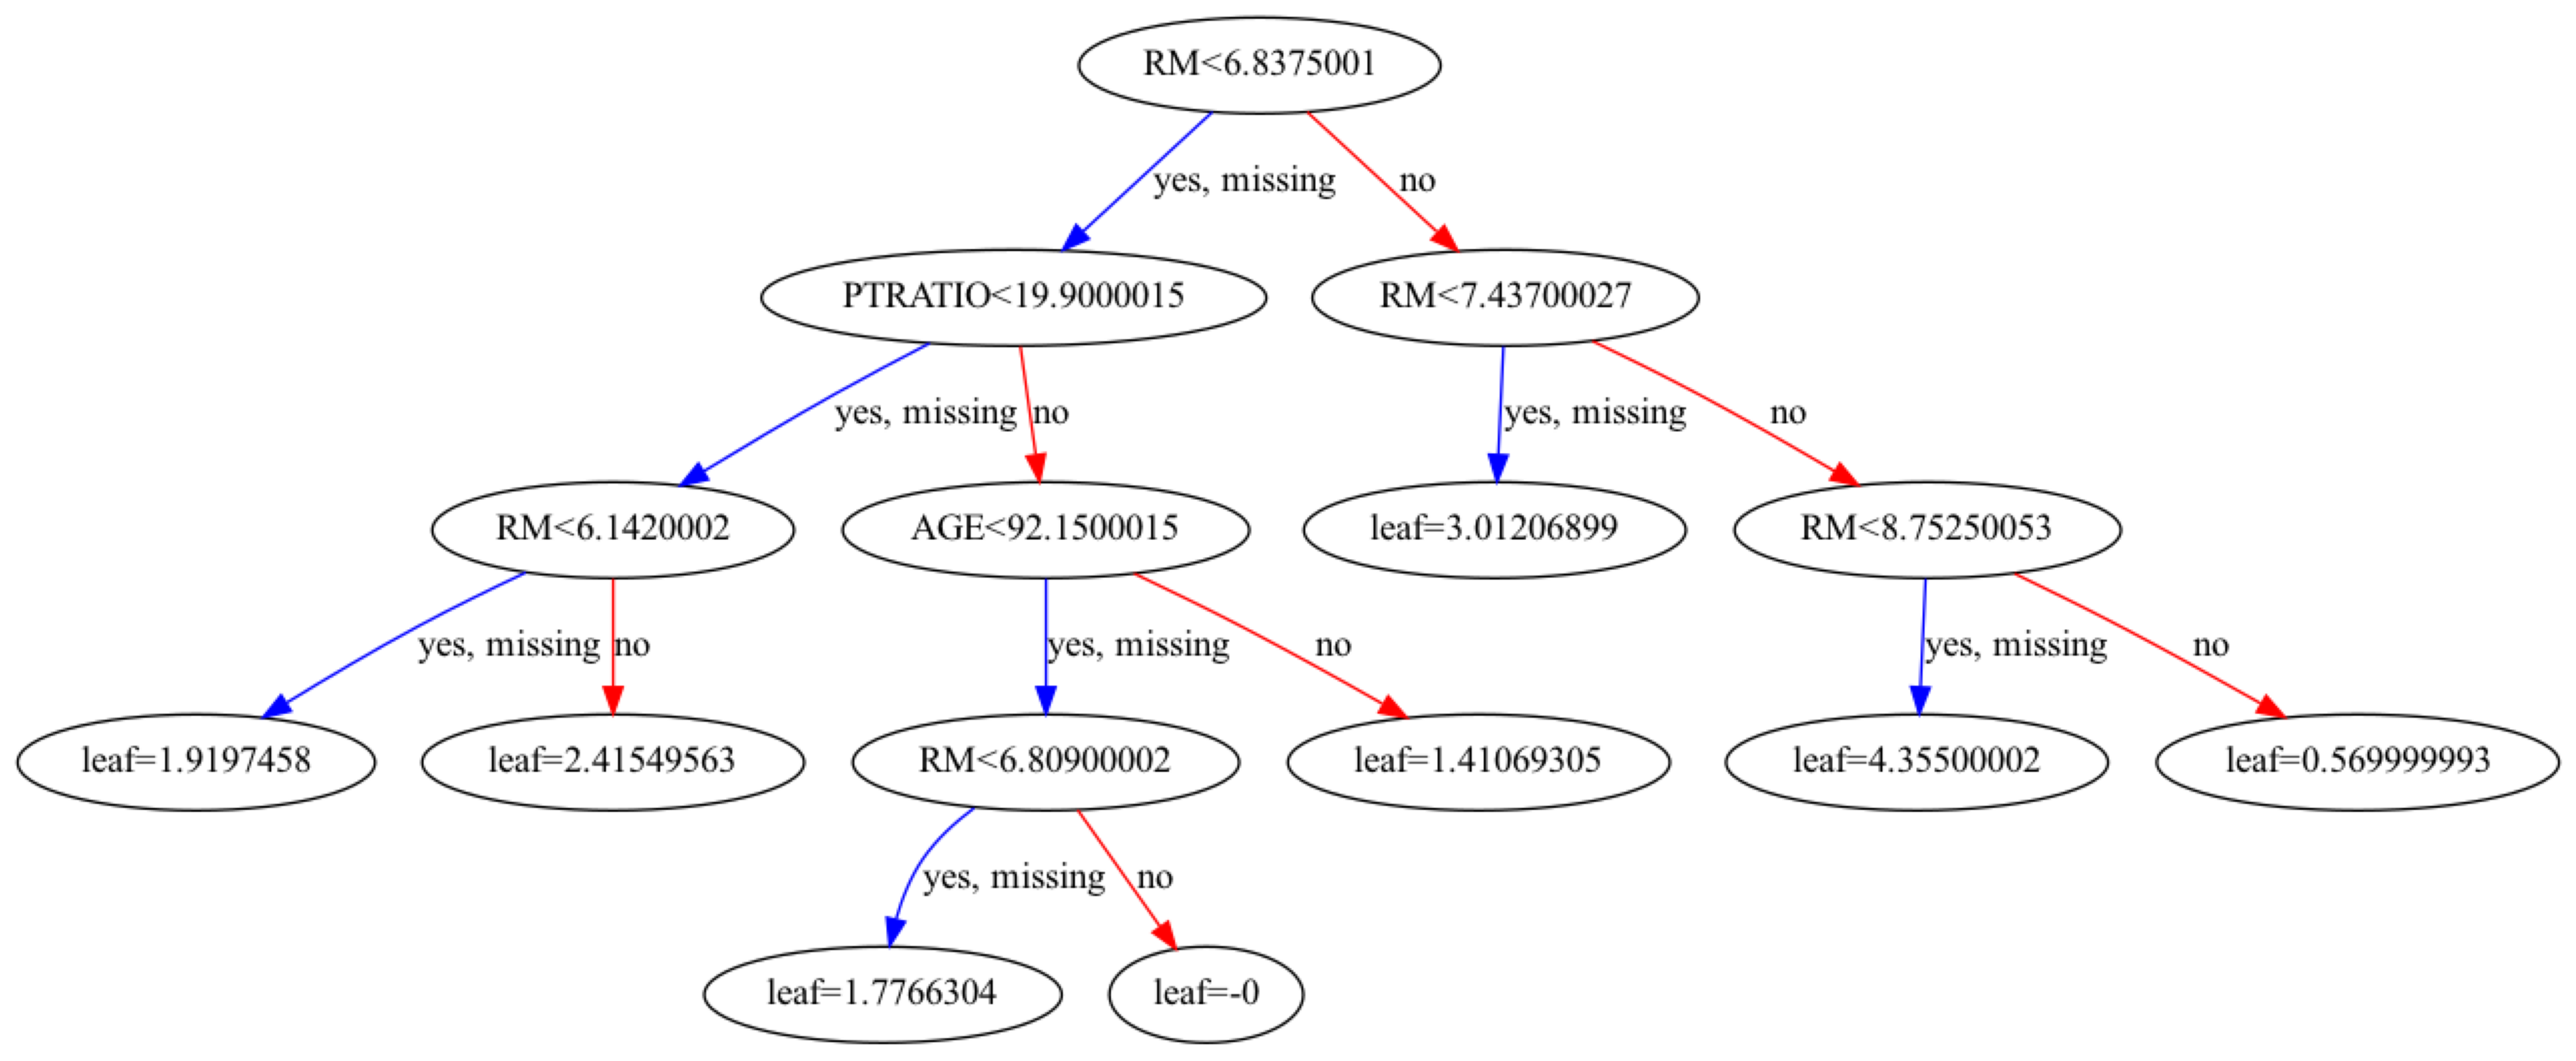

In [25]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 30]
plt.show()

These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions.
<br>
<br>
Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

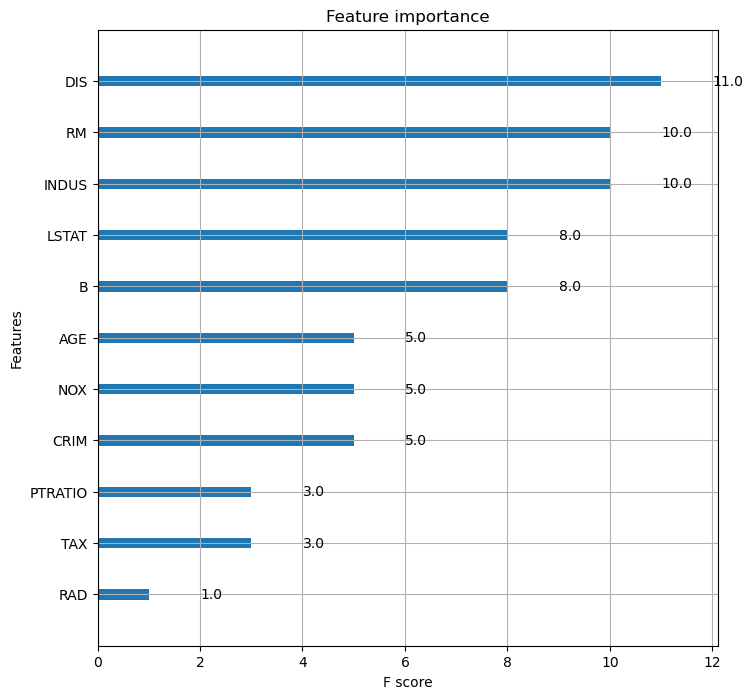

In [27]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

As you can see the feature RM has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection.